In [1]:
# initial imports:
import sys, platform, os
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import integrate
import copy

# ipython magic:
%load_ext autoreload
%autoreload 2

/home/andrewcats/anaconda3/envs/conda_andrea_g/lib/python3.9/site-packages/numpy/_core/getlimits.py:545: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [2]:
# import EFTCAMB:
here = './'
#camb_path = os.path.realpath(os.path.join(os.getcwd(),here))
#sys.path.insert(0, camb_path)
sys.path.insert(0, "/home/andrewcats/tesi_magistrale/eftcamb/eftcamb_new")
import camb
camb.set_feedback_level(10)
from camb import model, initialpower
from camb.baseconfig import CAMBError
print('EFTCAMB path:', camb.__path__)

EFTCAMB path: ['/home/andrewcats/tesi_magistrale/eftcamb/eftcamb_new/camb']


In [3]:
# run CAMB in GR mode for reference:

# set parameters:
pars_LCDM = camb.set_params(As=2.12605e-9,
                            ns=0.96,
                            H0=67.,
                            ombh2=0.022445,
                            omch2=0.120557,
                            mnu=0.06,
                            tau=0.079)
pars_LCDM.NonLinear = camb.model.NonLinear_none
# compute the spectra:
results_LCDM = camb.get_results(pars_LCDM)
# get the CMB TT power spectrum:
LCDM_TT_spectrum = copy.deepcopy(results_LCDM.get_cmb_power_spectra(pars_LCDM, CMB_unit='muK')['total'][:,0])
LCDM_ell = np.arange(LCDM_TT_spectrum.shape[0])

Reion redshift       =  10.038
Integrated opt depth =  0.0790
H0                   = 67.000000
Om_b h^2             =  0.022445
Om_c h^2             =  0.120557
Om_nu h^2            =  0.000645
Om_darkenergy        =  0.679922
Om_K                 =  0.000000
Om_m (inc Om_u)      =  0.319997
100 theta (CosmoMC)  =  1.040300
N_eff (total)        =  3.044000
 1 nu, g= 1.0147 m_nu*c^2/k_B/T_nu0=    356.59 (m_nu=  0.060 eV)
Reion opt depth      =  0.0790
Age of universe/GYr  =  13.812
zstar                =  1089.89
r_s(zstar)/Mpc       =  144.24
100*theta            =  1.040488
DA(zstar)/Gpc        =  13.86273
zdrag                =  1060.16
r_s(zdrag)/Mpc       =  146.87
k_D(zstar) Mpc       =  0.1411
100*theta_D          =  0.160562
z_EQ (if v_nu=1)     =  3417.99
k_EQ Mpc (if v_nu=1) =  0.010431
100*theta_EQ         =  0.810218
100*theta_rs_EQ      =  0.447723
tau_recomb/Mpc       =  280.33  tau_now/Mpc =  14142.9
Reion redshift       =  10.038
Integrated opt depth =  0.0790
H0        

In [4]:
# run EFTCAMB for a given model:

eftcamb_params = {'EFTflag':4,
                  'FullMappingEFTmodel':4,
                  'potential_model':8,
                  'V0':1.0, # range = [1.001,10] ? paper Raveri_Vafa
                  'm':1.0, # range = [0.001,10]
                  'phi0':0.0,
                  'offset':0.0,
                  'feedback_level':10
                  }

pars_EFT = camb.set_params(As=2.12605e-9,
                           ns=0.96,
                           H0=67.,
                           ombh2=0.022445,
                           omch2=0.120557,
                           mnu=0.06,
                           tau=0.079,
                           **eftcamb_params)
pars_EFT.NonLinear = camb.model.NonLinear_none
# compute results:
results_EFT = camb.get_results(pars_EFT)
# get the power spectrum:
EFT_TT_spectrum = copy.deepcopy(results_EFT.get_cmb_power_spectra(pars_EFT, CMB_unit='muK')['total'][:,0])
EFT_ell = np.arange(EFT_TT_spectrum.shape[0])

***************************************************************
     ______________________   __  ______  
    / __/ __/_  __/ ___/ _ | /  |/  / _ ) 
   / _// _/  / / / /__/ __ |/ /|_/ / _  | 
  /___/_/   /_/  \___/_/ |_/_/  /_/____/   V3.1 May23
  
***************************************************************

 EFTCAMB feedback level  = 10

 EFTCAMB stability flags:
  Math ghost stability   =  F
  Math mass stability    =  F
  Ghost stability        =  T
  Gradient stability     =  T
  Mass stability         =  F
  Mass stability rate    =  0.10000E+02
  Additional priors      =  T

 EFTCAMB model flags:
   EFTflag             =  4
   FullMappingEFTmodel =  4

   Model               =  Quintessence
   Number of params    =  5

   potential_model     =  8

   phidot_ini          =    0.000000

Cosine parametrization: V
   V0                  =    1.000000
   m                   =    1.000000
   phi0                =    0.000000
   offset              =    0.000000

******************

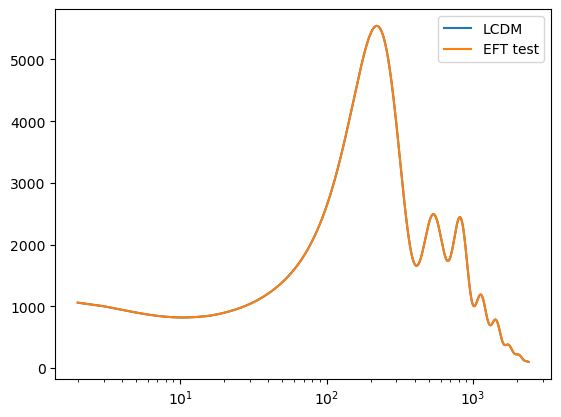

In [5]:
# compare some results with LCDM:

plt.plot(LCDM_ell[2:], LCDM_TT_spectrum[2:], label='LCDM')
plt.plot(EFT_ell[2:], EFT_TT_spectrum[2:], label='EFT test')
plt.xscale('log')
plt.legend();

***********************************************************************


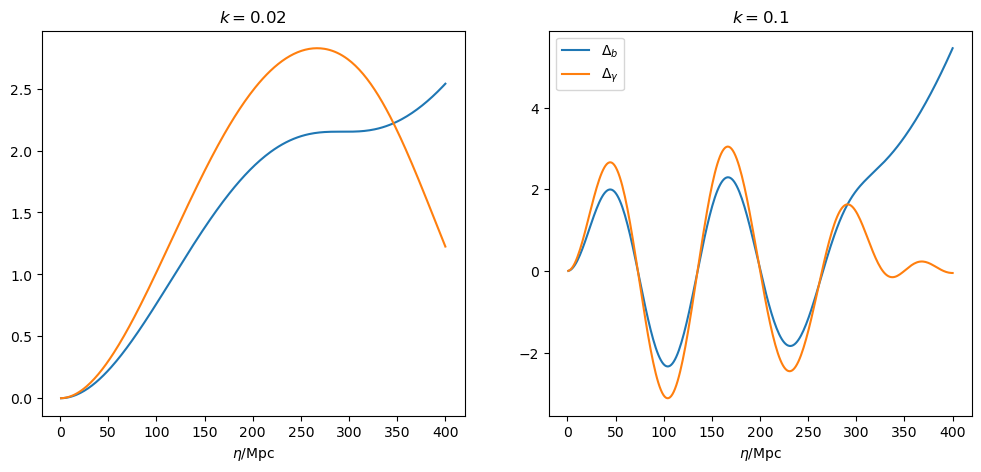

In [6]:
# make a plot of standard perturbations trough CAMB interface:
print('***********************************************************************')
eta = np.linspace(1, 400, 300)
ks = [0.02,0.1]
ev = results_EFT.get_time_evolution(ks, eta, ['delta_baryon','delta_photon'])
_, axs= plt.subplots(1,2, figsize=(12,5))
for i, ax in enumerate(axs):
    ax.plot(eta,ev[i,:, 0])
    ax.plot(eta,ev[i,:, 1])
    ax.set_title('$k= %s$'%ks[i])
    ax.set_xlabel(r'$\eta/\rm{Mpc}$');
plt.legend([r'$\Delta_b$', r'$\Delta_\gamma$'], loc = 'upper left')

***********************************************************************
EFT w: [-1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.         -1.         -1.         -1.         -1.         -1.
 -1.       

Text(0, 0.5, 'EFT w')

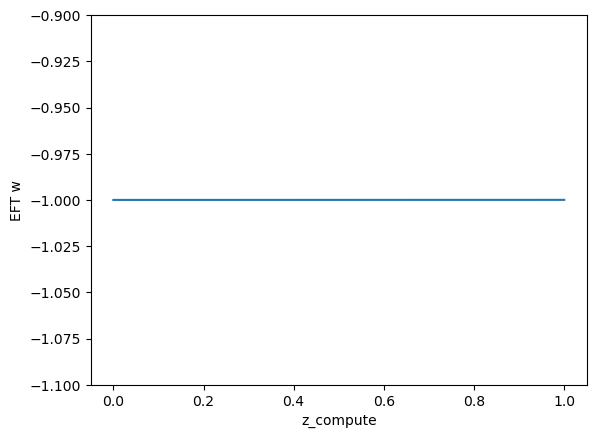

In [11]:
# test EFTCAMB a bit (effective definition of mu as a function of time for a couple of scales):
print('***********************************************************************')
a = np.logspace(-8,0,1000)
vars, val = pars_EFT.EFTCAMB.get_scale_evolution(results_EFT, [0.01,0.1,1.0], a)

# the function get_scale_evolution computes the folllowing quantities, at all given times and scales:
#print(vars)

# we compute the equation of state for the EFT model with get_scale_evolution:
#EFT_w = 'EFTLambda'/(2*'EFTc' - 'EFTLambda')
#print('EFTLambda:', val[0,:]['EFTLambda'])
#print('EFTc:', val[0,:]['EFTc'])
EFT_w = val[0,:]['EFTLambda']/(2*val[0,:]['EFTc'] - val[0,:]['EFTLambda'])
print('EFT w:', EFT_w)

# print the redshift:
a = val[0,:]['a']
z = 1./a - 1.
#print('z_compute:', z_compute)

# print the redshift:
#z = val[0,:]['z']
#print('z:', z)

# we plot the equation of state:
plt.plot(a, EFT_w)
plt.ylim(-1.1, -0.9)
plt.xlabel('z_compute')
plt.ylabel('EFT w')

# we plot one:
#plt.plot( val[0,:]['a'], np.abs(val[0,:]['mu']) )
#plt.plot( val[1,:]['a'], np.abs(val[1,:]['mu']) )
#plt.plot( val[2,:]['a'], np.abs(val[2,:]['mu']) )
#plt.xlabel('a')
#plt.ylabel('Effective $\mu$')
#plt.xscale('log')

In [ ]:
# test EFTCAMB a bit (effective definition of mu as a function of scale):
k = np.logspace(-6,0,100)
a = np.array([1.0])

vars, val = pars_EFT.EFTCAMB.get_scale_evolution(results_EFT, k, a)
vars_ref, val_ref = pars_LCDM.EFTCAMB.get_scale_evolution(results_LCDM, k, a)

plt.plot( val[:, 0]['k'], np.abs(val[:, 0]['mu']) )
plt.plot( val_ref[:, 0]['k'], np.abs(val_ref[:, 0]['mu']) )
plt.xlabel('k')
plt.ylabel('Effective $\mu$')
plt.xscale('log')
plt.yscale('log')

In [ ]:
# print EFTCAMB header
pars_EFT.EFTCAMB.feedback()

In [ ]:
# how many extra parameters we have:
pars_EFT.EFTCAMB.num_params()

In [ ]:
# how they are called and their values:
print(pars_EFT.EFTCAMB.param_names())
print(pars_EFT.EFTCAMB.param_labels())
print(pars_EFT.EFTCAMB.param_values())

In [ ]:
# how the model is called:
print(pars_EFT.EFTCAMB.model_name())

In [ ]:
# after initializing EFTCAMB we can query for the parameters that have actually been used during initialization:
print(pars_EFT.EFTCAMB.read_parameters())
# this is usually the best way to initialize a model and make sure all flags are correct...